### Boston Dataset using Linear Regression

### IMPORTING LIBRARIES

In [19]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.datasets import load_boston
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler

### DATA PREPROCESSING

In [20]:
data=load_boston()
features=pd.DataFrame(data=data.data,columns=data.feature_names)
target=pd.DataFrame(data=data.target, columns=['target'])

In [21]:
boston=pd.concat([features,target],axis=1)

In [22]:
print('Boston DataFrame Info')
boston.info()

Boston DataFrame Info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  target   506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [23]:
print('Boston DataFrame first 5 rows')
boston.head()

Boston DataFrame first 5 rows


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [24]:
print('NaN values')
boston.isna().sum()

NaN values


CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
target     0
dtype: int64

### CORRELATION MATRIX

In [25]:
corr_matrix=boston.corr()
print('Correlation matrix')
print(corr_matrix)

Correlation matrix
             CRIM        ZN     INDUS      CHAS       NOX        RM       AGE  \
CRIM     1.000000 -0.200469  0.406583 -0.055892  0.420972 -0.219247  0.352734   
ZN      -0.200469  1.000000 -0.533828 -0.042697 -0.516604  0.311991 -0.569537   
INDUS    0.406583 -0.533828  1.000000  0.062938  0.763651 -0.391676  0.644779   
CHAS    -0.055892 -0.042697  0.062938  1.000000  0.091203  0.091251  0.086518   
NOX      0.420972 -0.516604  0.763651  0.091203  1.000000 -0.302188  0.731470   
RM      -0.219247  0.311991 -0.391676  0.091251 -0.302188  1.000000 -0.240265   
AGE      0.352734 -0.569537  0.644779  0.086518  0.731470 -0.240265  1.000000   
DIS     -0.379670  0.664408 -0.708027 -0.099176 -0.769230  0.205246 -0.747881   
RAD      0.625505 -0.311948  0.595129 -0.007368  0.611441 -0.209847  0.456022   
TAX      0.582764 -0.314563  0.720760 -0.035587  0.668023 -0.292048  0.506456   
PTRATIO  0.289946 -0.391679  0.383248 -0.121515  0.188933 -0.355501  0.261515   
B       -

### VISUALIZING THE CORRELATION OF FEATURES WITH TARGET

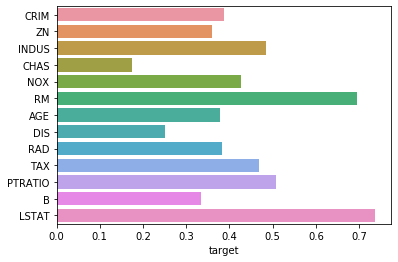

In [26]:
corr_matrix.drop('target',axis=0,inplace=True)
corr_matrix['target']=abs(corr_matrix['target'])
sns.barplot(y=corr_matrix.index,x=corr_matrix['target']);

### SCALING THE DATASET USING MINMAXSCALER

In [27]:
scalar=MinMaxScaler()
bostonArray=boston.drop('CHAS',axis=1).values
bostonArrayScaled=scalar.fit_transform(bostonArray)
bostonScaled=pd.DataFrame(bostonArrayScaled,columns=boston.drop('CHAS',axis=1).columns)

In [28]:
print('BostonScaled DataFrame first 5 rows')
bostonScaled.head()

BostonScaled DataFrame first 5 rows


,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.000000,0.18,0.067815,0.314815,0.577505,0.641607,0.269203,0.000000,0.208015,0.287234,1.000000,0.089680,0.422222
1,0.000236,0.00,0.242302,0.172840,0.547998,0.782698,0.348962,0.043478,0.104962,0.553191,1.000000,0.204470,0.368889
2,0.000236,0.00,0.242302,0.172840,0.694386,0.599382,0.348962,0.043478,0.104962,0.553191,0.989737,0.063466,0.660000
3,0.000293,0.00,0.063050,0.150206,0.658555,0.441813,0.448545,0.086957,0.066794,0.648936,0.994276,0.033389,0.631111
4,0.000705,0.00,0.063050,0.150206,0.687105,0.528321,0.448545,0.086957,0.066794,0.648936,1.000000,0.099338,0.693333


In [29]:
x=bostonScaled.drop('target',axis=1)
y=bostonScaled['target']

### SPLITTING UP THE DATASET TO TRAIN AND TEST SET

In [30]:
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.25,random_state=3)

### LINEAR REGRESSION MODEL

In [31]:
linearReg=LinearRegression(fit_intercept=True)
model=linearReg.fit(train_x,train_y)

### R-SQUARED VALUE ON TRAIN AND TEST SET

In [32]:
r2_train=model.score(train_x,train_y)
print("R Squared value for train data: ",r2_train)
r2_test=model.score(test_x,test_y)
print("R Squared value for test data: ",r2_test)

R Squared value for train data:  0.7203497579766609
R Squared value for test data:  0.7731110845563154


### PREDICTING THE TARGET VALUE USING TEST SET

In [33]:
predict_y=model.predict(test_x)

### RMSE VALUE

In [34]:
mse=mean_squared_error(test_y,predict_y)
rmse=np.sqrt(mse)
print('RMSE value: ',rmse)

RMSE value:  0.09530180348604683


### PLOTTING THE RESIDUALS WITH THE PREDICTED VALUES OF TARGET

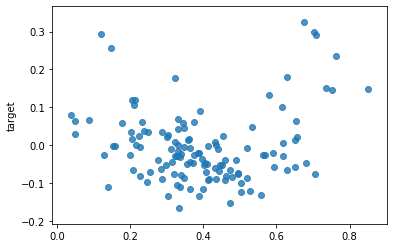

In [35]:
residuals=test_y - predict_y
sns.regplot(x=predict_y,y=residuals,fit_reg=False);